In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["GOOG", "IBM", "AAPL", "MSFT", "AMZN"]
data = yf.download(tickers, start='2019-01-01', end='2025-01-01')["Close"]
print(data.head)

/var/folders/c4/kq748kl11rbdh1zn5wq0t37c0000gn/T/ipykernel_81336/3516936266.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2019-01-01', end='2025-01-01')["Close"]
[*********************100%***********************]  5 of 5 completed

<bound method NDFrame.head of Ticker            AAPL        AMZN        GOOG         IBM        MSFT
Date                                                                  
2019-01-02   37.575211   76.956497   51.983505   81.641182   94.945526
2019-01-03   33.832447   75.014000   50.502800   80.011307   91.452652
2019-01-04   35.276730   78.769501   53.219158   83.136391   95.706047
2019-01-07   35.198212   81.475502   53.103840   83.724503   95.828087
2019-01-08   35.869186   82.829002   53.496006   84.915039   96.522919
...                ...         ...         ...         ...         ...
2024-12-24  257.286682  229.050003  197.108246  219.963989  437.647369
2024-12-26  258.103729  227.050003  196.639343  220.434464  436.432068
2024-12-27  254.685883  223.750000  193.586487  218.366287  428.881104
2024-12-30  251.307877  221.300003  192.239655  215.886398  423.202911
2024-12-31  249.534180  219.389999  189.994904  215.474731  419.885681

[1510 rows x 5 columns]>


In [9]:
#cleaning
print(data.isnull().sum())
data = data.dropna()

Ticker
AAPL    0
AMZN    0
GOOG    0
IBM     0
MSFT    0
dtype: int64


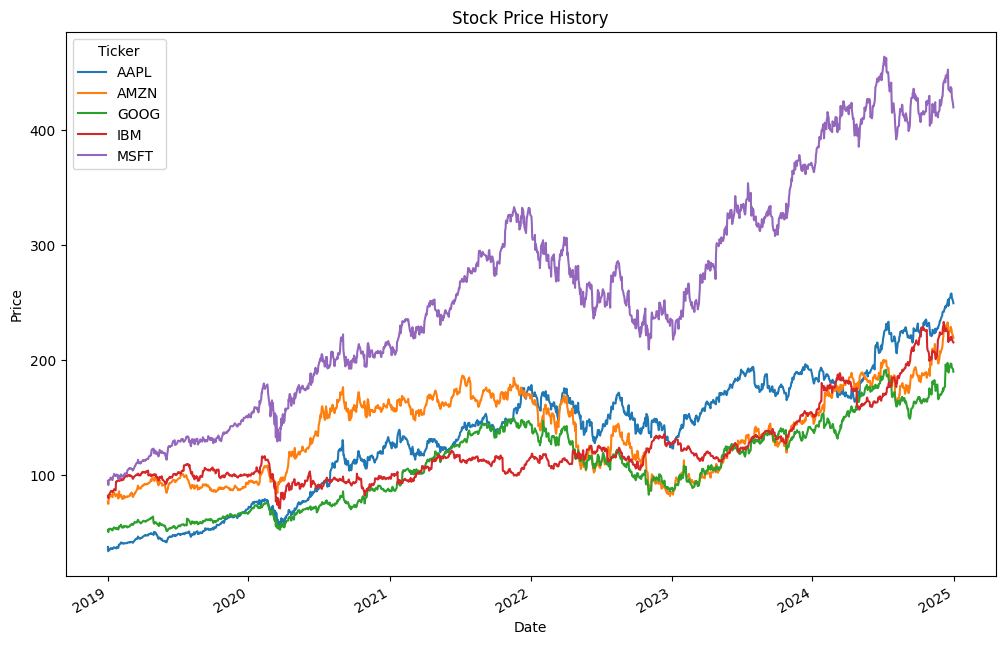

In [10]:
data.plot(figsize=(12, 8))
plt.title("Stock Price History")
plt.ylabel("Price")
plt.xlabel("Date")

data.index = pd.to_datetime(data.index)

Ticker          AAPL      AMZN      GOOG       IBM      MSFT
Date                                                        
2019-01-03 -0.099607 -0.025241 -0.028484 -0.019964 -0.036788
2019-01-04  0.042689  0.050064  0.053786  0.039058  0.046509
2019-01-07 -0.002226  0.034353 -0.002167  0.007074  0.001275
2019-01-08  0.019063  0.016612  0.007385  0.014220  0.007251
2019-01-09  0.016982  0.001714 -0.001505  0.007177  0.014300


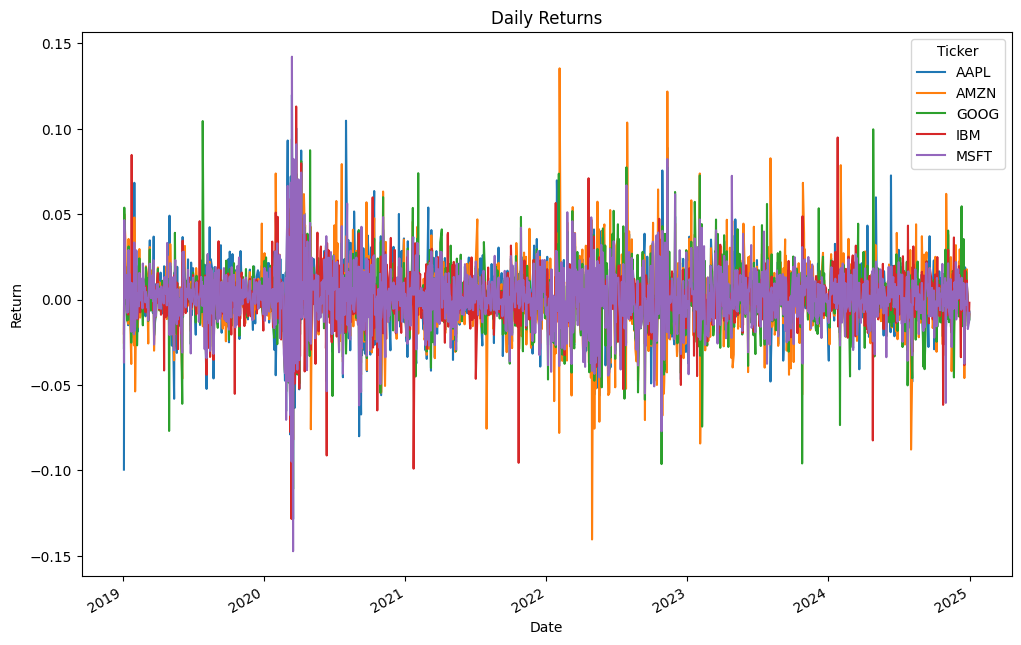

In [11]:
#daily returns
returns = data.pct_change().dropna()
print(returns.head())

returns.plot(figsize=(12, 8))
plt.title("Daily Returns")
plt.ylabel("Return")
plt.xlabel("Date")
plt.show()

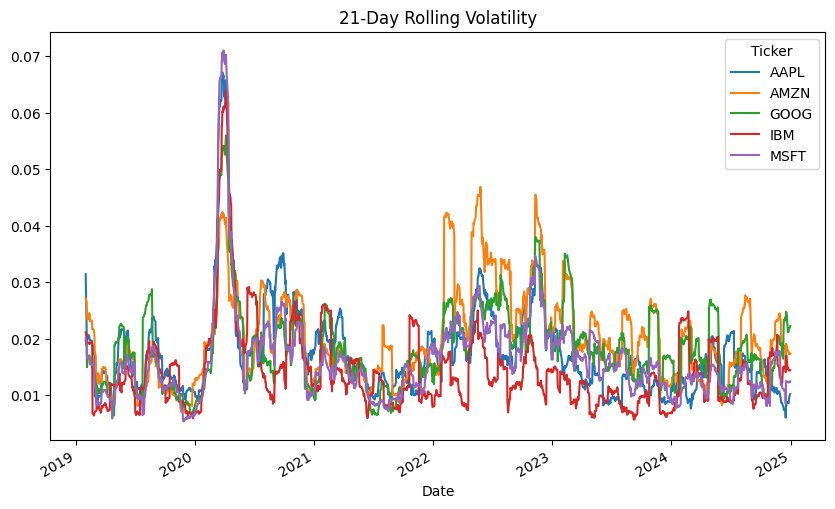

In [12]:
#rolling volatility
rolling_vol = returns.rolling(window=21).std()
rolling_vol.plot(figsize=(10, 6))
plt.title("21-Day Rolling Volatility")
plt.show()

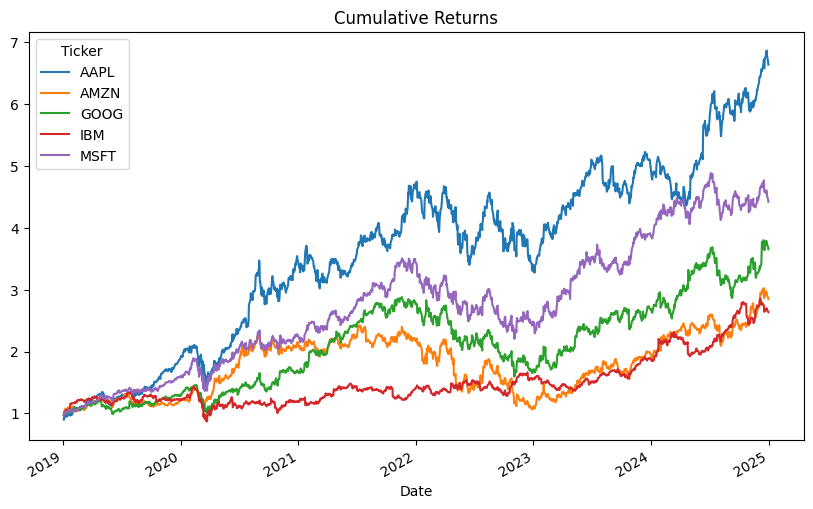

In [13]:
#cumulative returns
cum_returns = (1 + returns).cumprod()
cum_returns.plot(figsize=(10, 6))
plt.title("Cumulative Returns")
plt.show()

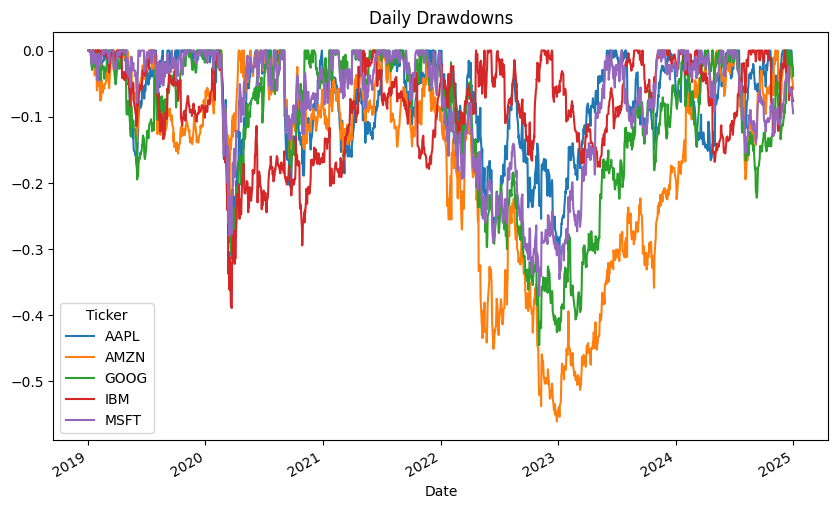

In [14]:
#Drawdown
rolling_max = cum_returns.cummax()
drawdowns = (cum_returns - rolling_max) / rolling_max

drawdowns.plot(figsize=(10, 6))
plt.title("Daily Drawdowns")
plt.show()